In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import random

print("All imports good to go")

All imports good to go


In [2]:
task_array = np.random.randint(1, 101, size=20)
print(task_array)

[46 38  8 62 57 32 80 54 63  9 74 76 56 72 37 55 31 94 35 35]


In [3]:
filtered = task_array[task_array > 50].mean()
print(f"{filtered:.3f}")

67.545


In [4]:
df = pd.read_csv('../../data/raw/listings.csv')
df.shape

(15187, 79)

In [5]:
df['estimated_revenue_l365d'].dtype

dtype('float64')

In [6]:
df[
df['estimated_revenue_l365d'] >
df['estimated_revenue_l365d'].mean()][
['listing_url','host_neighbourhood','bedrooms','estimated_revenue_l365d']
].sort_values('estimated_revenue_l365d', ascending = False).head(5)

,listing_url,host_neighbourhood,bedrooms,estimated_revenue_l365d
11581,https://www.airbnb.com/rooms/1147207983939619570,Gateway District,1.0,3900000.0
9002,https://www.airbnb.com/rooms/854345788191857434,Central Business District,1.0,2400000.0
9006,https://www.airbnb.com/rooms/854346834290244897,Central Business District,1.0,1500000.0
13249,https://www.airbnb.com/rooms/1294901907419073449,Gateway District,1.0,900000.0
10002,https://www.airbnb.com/rooms/973897159428898174,South Austin,4.0,499500.0


In [7]:
df.isna().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               2911
Length: 79, dtype: int64

In [8]:
model = LinearRegression()

features = ['neighbourhood_cleansed', 'latitude', 'longitude']
target = 'estimated_occupancy_l365d'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model.fit(X_train, y_train)

print("Model has been trained")

Model has been trained


In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12149, 3)
(12149,)
(3038, 3)
(3038,)


In [10]:
predictions = model.predict(X_test)

print(f"First 5 Preds:\n{predictions[:5]}")
print(f"\nFirst 5 actual:\n{y_test.iloc[:5].values}")

First 5 Preds:
[63.04381864 61.88274041 62.02752811 62.02755008 62.27500657]

First 5 actual:
[12  0  0  0 20]


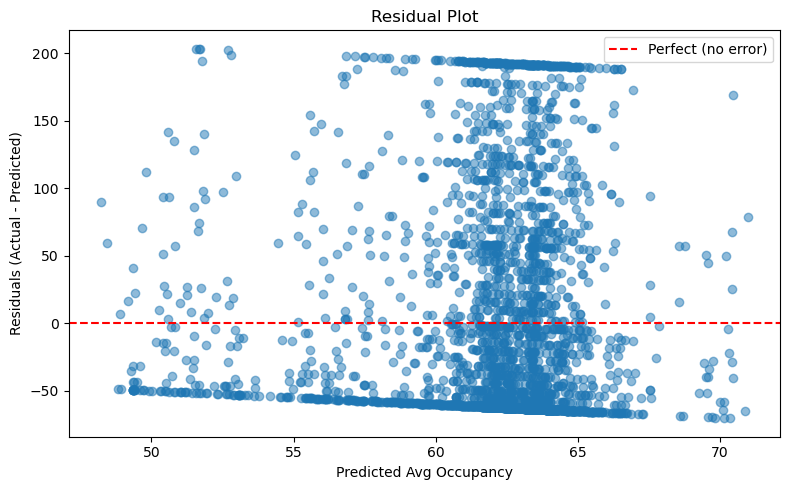

In [12]:
residuals = y_test.values - predictions

plt.figure(figsize = (8,5))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', label='Perfect (no error)')
plt.xlabel('Predicted Avg Occupancy')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.legend()
plt.tight_layout()
plt.show()